In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Численный анализ в относительных показателях

In [26]:
# Задаем параметры для расчетов
A = 1
α = 0.5
s = 0.2
μ = 0.05
λ = 0.001
k_cap = ((s * A)/(λ + μ)) ** (1/(1-α))
delta_t = 2
T = 100 # количество наблюдений
# Создаем датасет и добавляем столбец с t и задаем его первое значение - 0  и
# c помощью цикла считаем значения столбца t через приращения
df = pd.DataFrame({'t': [0]})

for i in range(1,T + 1):
    df.loc[i,'t'] = df.loc[i-1,'t'] + delta_t 
    
# Зададим функцию для расчета прироста k
def delta_k(k):
    return delta_t * (-(μ + λ) * k + s * A * k**α)

Реализуем алгоритм для трех случаев 
- для равновесного режима
- для случая k > k^
- для случая k < k^

In [27]:
# Можно написать функцию, чтобы не писать одно и то же несколько раз, т.к. алгоритм расчета одинаков
def k_and_delta(df, k_column, k_0, delta_k_func):
    
    df.loc[0, k_column] = k_0 
    
    for i in range(1, df.shape[0]):
        df.loc[i - 1, f'delta_{k_column}'] = delta_k_func(df.loc[i - 1, k_column])
        df.loc[i, k_column] = df.loc[i - 1, k_column] + df.loc[i - 1, f'delta_{k_column}']
    
    return df

In [28]:
df = k_and_delta(df, 'k', k_cap, delta_k)
df = k_and_delta(df, 'k_down', k_cap * 1.1, delta_k)
df = k_and_delta(df, 'k_up', k_cap * 0.9, delta_k)

df

,t,k,delta_k,k_down,delta_k_down,k_up,delta_k_up
0,0.0,15.3787,0.0,16.916571,-0.080300,13.840830,0.076366
1,2.0,15.3787,0.0,16.836271,-0.076019,13.917196,0.072676
2,4.0,15.3787,0.0,16.760252,-0.071974,13.989873,0.069155
3,6.0,15.3787,0.0,16.688278,-0.068153,14.059027,0.065794
4,8.0,15.3787,0.0,16.620125,-0.064541,14.124821,0.062588
...,...,...,...,...,...,...,...
96,192.0,15.3787,0.0,15.388552,-0.000503,15.368318,0.000529
97,194.0,15.3787,0.0,15.388050,-0.000477,15.368847,0.000502
98,196.0,15.3787,0.0,15.387573,-0.000453,15.369350,0.000477
99,198.0,15.3787,0.0,15.387120,-0.000429,15.369827,0.000453


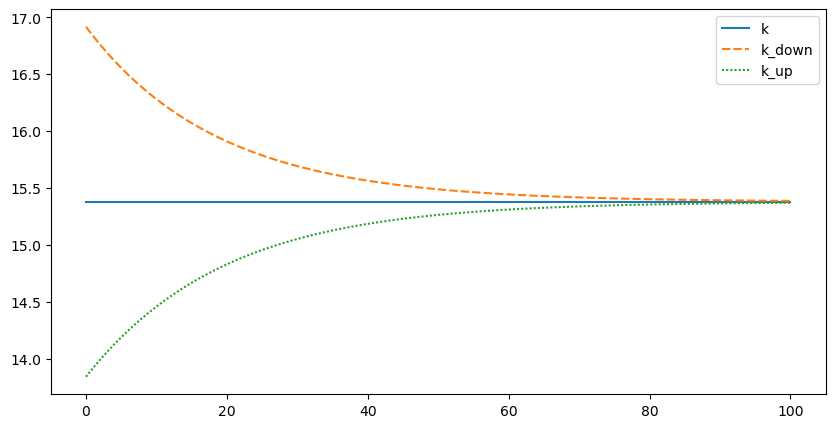

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[['k', 'k_down', 'k_up']]);

In [21]:
def output_per_capita(df, A, k, α):
    y = A * k**α
    return y

In [30]:
df['y_k'] = output_per_capita(df, A, df['k'], α)
df['y_k_down'] = output_per_capita(df, A, df['k_down'], α)
df['y_k_up'] = output_per_capita(df, A, df['k_up'], α)

df

,t,k,delta_k,k_down,delta_k_down,k_up,delta_k_up,y_k,y_k_down,y_k_up
0,0.0,15.3787,0.0,16.916571,-0.080300,13.840830,0.076366,3.921569,4.112976,3.720327
1,2.0,15.3787,0.0,16.836271,-0.076019,13.917196,0.072676,3.921569,4.103202,3.730576
2,4.0,15.3787,0.0,16.760252,-0.071974,13.989873,0.069155,3.921569,4.093929,3.740304
3,6.0,15.3787,0.0,16.688278,-0.068153,14.059027,0.065794,3.921569,4.085129,3.749537
4,8.0,15.3787,0.0,16.620125,-0.064541,14.124821,0.062588,3.921569,4.076779,3.758300
...,...,...,...,...,...,...,...,...,...,...
96,192.0,15.3787,0.0,15.388552,-0.000503,15.368318,0.000529,3.921569,3.922825,3.920245
97,194.0,15.3787,0.0,15.388050,-0.000477,15.368847,0.000502,3.921569,3.922760,3.920312
98,196.0,15.3787,0.0,15.387573,-0.000453,15.369350,0.000477,3.921569,3.922700,3.920376
99,198.0,15.3787,0.0,15.387120,-0.000429,15.369827,0.000453,3.921569,3.922642,3.920437


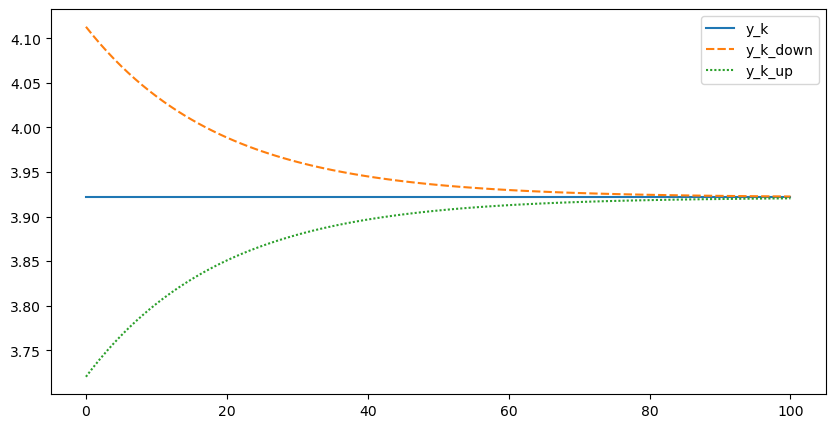

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[['y_k', 'y_k_down', 'y_k_up']]);

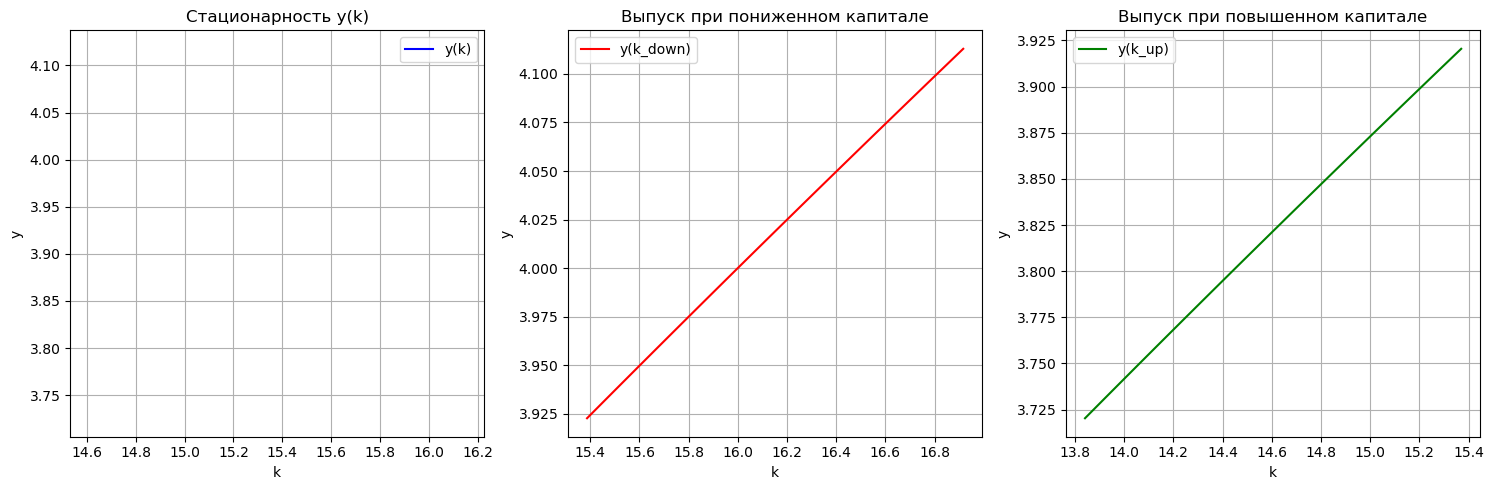

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(df['k'], df['y_k'], label='y(k)', color='blue')
axes[0].set_xlabel('k')
axes[0].set_ylabel('y')
axes[0].set_title('Стационарность y(k)')
axes[0].grid()
axes[0].legend()

axes[1].plot(df['k_down'], df['y_k_down'], label='y(k_down)', color='red')
axes[1].set_xlabel('k')
axes[1].set_ylabel('y')
axes[1].set_title('Выпуск при пониженном капитале')
axes[1].grid()
axes[1].legend()

axes[2].plot(df['k_up'], df['y_k_up'], label='y(k_up)', color='green')
axes[2].set_xlabel('k')
axes[2].set_ylabel('y')
axes[2].set_title('Выпуск при повышенном капитале')
axes[2].grid()
axes[2].legend()

plt.tight_layout()
plt.show()

### Численный анализ в абсолютных показателях

<p style="text-align: center;">Основные уравнения модели</p>

1. ПФ Кобба-Дугласа:
   $$
   Y(t) = A K(t)^{\alpha} L(t)^{(1-\alpha)}
   $$

2. Разделение выпуска:
   $$
   Y = C + I
   $$

3. Инвестиции (вспомогательное уравнение):
   $$
   I = sY
   $$

4. Динамика численности населения:
   $$
   \frac{dL}{dt} = \lambda L
   $$

5. Динамика капитала:
   $$
   \frac{dK}{dt} = sY - \mu K
   $$



In [34]:
# Задаем параметры модели
A = 1
α = 0.5 # эластичность выпуска по капиталу
s = 0.2 # норма сбережений
μ = 0.05 # норма амортизации
λ = 0.001  # темп прироста населения
delta_t = 2

L0 = 100     # начальная численность населения
K0 = 50       # начальный капитал

T = 100

In [35]:
# Функция для решения дифференциального уравнения
def solow_absolute(t, K):
    L = L0 * np.exp(λ * t)  
    Y = A * K**α * L**(1 - α)  
    dKdt = s * Y - μ * K  
    return L, Y, dKdt

In [36]:
t_arr = np.arange(0, T, delta_t)  # массив временных значений

# создадим массивы для K,L,Y
K_arr = np.zeros(len(t_arr))
L_arr = np.zeros(len(t_arr))
Y_arr = np.zeros(len(t_arr))

#начальные значения факторов нам известны
K_arr[0] = K0
L_arr[0] = L0

# применяем метод Эйлера
for i in range(1, len(t_arr)):
    t = t_arr[i-1]
    L, Y, dKdt = solow_absolute(t, K_arr[i-1])  
    K_arr[i] = K_arr[i-1] + dKdt * delta_t  
    L_arr[i] = L
    Y_arr[i] = Y

# запишем в таблицу для нагядности
df = pd.DataFrame({
    "t": t_arr,
    "L": L_arr,
    "K": K_arr,
    "Y": Y_arr
})

df 

,t,L,K,Y
0,0,100.000000,50.000000,0.000000
1,2,100.000000,73.284271,70.710678
2,4,100.200200,100.232597,85.691882
3,6,100.400801,130.336003,100.316664
4,8,100.601804,163.105524,114.507803
5,10,100.803209,198.084830,128.224647
6,12,101.005017,234.855582,141.448088
7,14,101.207229,273.038924,154.172250
8,16,101.409846,312.294882,166.399625
9,18,101.612869,352.320629,178.138089


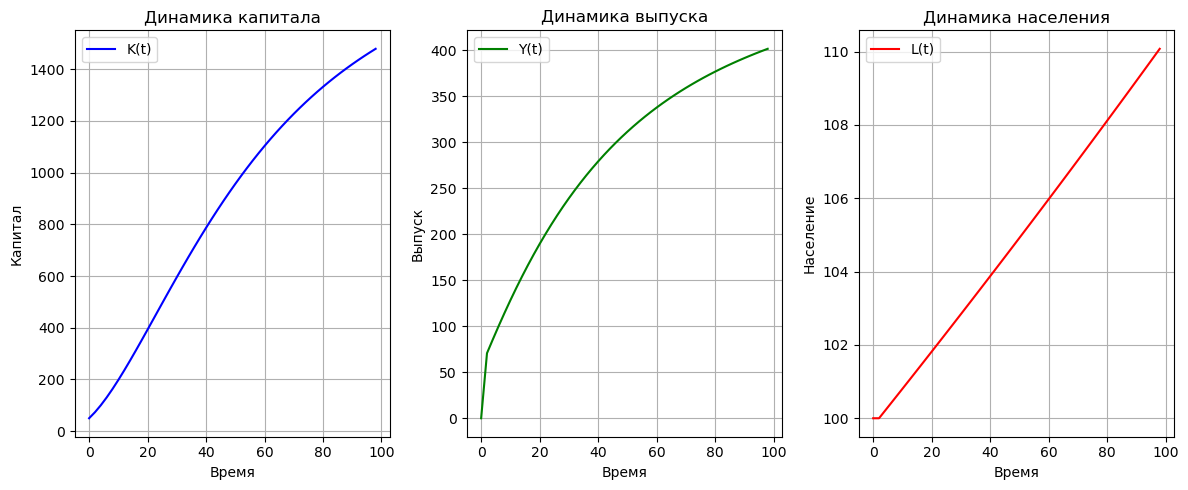

In [37]:
fig, axes = plt.subplots(1,3, figsize=(12, 5)) 

axes[0].plot(t_arr, K_arr, label="K(t)", color='blue')
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Капитал")
axes[0].set_title("Динамика капитала")
axes[0].grid()
axes[0].legend()

axes[1].plot(t_arr, Y_arr, label="Y(t)", color='green')
axes[1].set_xlabel("Время")
axes[1].set_ylabel("Выпуск")
axes[1].set_title("Динамика выпуска")
axes[1].grid()
axes[1].legend()

axes[2].plot(t_arr, L_arr, label="L(t)", color='red')
axes[2].set_xlabel("Время")
axes[2].set_ylabel("Население")
axes[2].set_title("Динамика населения")
axes[2].grid()
axes[2].legend()

plt.tight_layout() 
plt.show()